# **StreamVision Analytics**
## *Decoding Netflix's Global Content Strategy Through Data*

---

### Major Project Proposal

**Project by:** Girija G

**Date:** October 2025

---

## 1. Introduction to Dataset

The dataset under consideration is a **Netflix dataset containing 7,789 records and 11 columns**. It includes important details about **Movies and TV Shows** available on the platform.

**Key attributes include:**
- Title
- Director
- Cast
- Country of origin
- Release date
- Rating
- Duration
- Type (genres)

The dataset spans multiple years, with entries ranging from **2008 to 2021**, covering content across diverse countries and genres.

## 2. Problem Statement

Netflix has become one of the most prominent global streaming platforms, continuously expanding its library with a mix of **original productions and licensed content**. However, with growing competition from platforms like Amazon Prime, Disney+, and regional OTT providers, Netflix must strategically analyze its content catalog to identify strengths, gaps, and opportunities.

The specific problem to be addressed in this project is **'Content Trends Analysis for Strategic Recommendations'**.

**The aim is to:**
- Uncover how Netflix's content distribution (Movies vs. TV Shows, genres, and country contributions) has evolved over the years
- Enable the identification of key genres, audience preferences, and strategic insights into global content expansion

## 3. Importance of the Problem Statement

Understanding Netflix's content trends is crucial for making **data-driven business decisions**. The analysis not only highlights the balance between Movies and TV Shows but also reveals popular genres and underrepresented categories.

For a platform that serves diverse international audiences, **country-wise contributions** provide valuable insights into global representation and market penetration.

By focusing on these content trends, Netflix can refine its strategy for **content acquisition and production**, ensuring that it caters to the right audience segments while staying competitive in the global OTT industry.

## 4. Objectives

1. **Analyze the distribution of Movies vs. TV Shows over the years**
2. **Identify the most common genres and how their popularity has changed**
3. **Compare country-wise contributions to Netflix's catalog**
4. **Discover content rating patterns and their evolution**
5. **Examine the relationship between duration and content type**
6. **Identify top directors and cast members**

## 5. Expected Outcomes

- A clear understanding of how Netflix's content strategy has evolved
- Identification of top-performing genres and categories
- Strategic recommendations on which content types Netflix should focus on in the future
- Insights into geographical content distribution and market opportunities
- Data-driven recommendations for content acquisition and production

---

## 6. Data Analysis Implementation

### 6.1 Import Required Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Setup visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


### 6.2 Load and Explore Dataset

In [2]:
# Load the Netflix dataset
df = pd.read_csv("Netflix Dataset.csv")

# Display basic information
print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"\nShape of Dataset: {df.shape}")
print(f"Number of Records: {df.shape[0]:,}")
print(f"Number of Features: {df.shape[1]}")
print(f"\nColumn Names:\n{df.columns.tolist()}")

# Display first few rows
print("\n" + "="*60)
print("SAMPLE DATA (First 5 Rows)")
print("="*60)
df.head()

DATASET OVERVIEW

Shape of Dataset: (7789, 11)
Number of Records: 7,789
Number of Features: 11

Column Names:
['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']

SAMPLE DATA (First 5 Rows)


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
# Check data types and missing values
print("\n" + "="*60)
print("DATA TYPES AND MISSING VALUES")
print("="*60)
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': df.isnull().sum(),
    'Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
print(missing_df[missing_df['Missing Count'] > 0])


DATA TYPES AND MISSING VALUES

Data Types:
Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

Missing Values:
                    Column  Missing Count  Percentage
Director          Director           2388       30.66
Cast                  Cast            718        9.22
Country            Country            507        6.51
Release_Date  Release_Date             10        0.13
Rating              Rating              7        0.09


### 6.3 Data Cleaning and Preprocessing

In [4]:
# Data Cleaning Steps
print("Performing Data Cleaning...\n")

# 1. Convert Release_Date to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
print("✓ Converted Release_Date to datetime format")

# 2. Extract Year and Month
df['Year'] = df['Release_Date'].dt.year
df['Month'] = df['Release_Date'].dt.month
df['Month_Name'] = df['Release_Date'].dt.month_name()
print("✓ Extracted Year and Month from Release_Date")

# 3. Handle missing values
df['Director'] = df['Director'].fillna("Unknown")
df['Cast'] = df['Cast'].fillna("Unknown")
df['Country'] = df['Country'].fillna("Unknown")
df['Rating'] = df['Rating'].fillna("Not Rated")
print("✓ Filled missing values with appropriate placeholders")

# 4. Extract Main Genre (first genre listed in 'Type')
df['Main_Genre'] = df['Type'].apply(lambda x: x.split(",")[0].strip() if pd.notnull(x) else "Unknown")
print("✓ Extracted Main Genre from Type column")

# 5. Extract duration as numeric (for movies)
df['Duration_Minutes'] = df.apply(
    lambda x: int(x['Duration'].split()[0]) if 'min' in str(x['Duration']) else np.nan, axis=1
)
print("✓ Extracted numeric duration for movies")

# 6. Extract number of seasons (for TV shows)
df['Num_Seasons'] = df.apply(
    lambda x: int(x['Duration'].split()[0]) if 'Season' in str(x['Duration']) else np.nan, axis=1
)
print("✓ Extracted number of seasons for TV shows")

print("\n" + "="*60)
print("DATA CLEANING COMPLETED!")
print("="*60)
print(f"\nCleaned dataset shape: {df.shape}")
print(f"Years covered: {int(df['Year'].min())} to {int(df['Year'].max())}")

Performing Data Cleaning...

✓ Converted Release_Date to datetime format
✓ Extracted Year and Month from Release_Date
✓ Filled missing values with appropriate placeholders
✓ Extracted Main Genre from Type column
✓ Extracted numeric duration for movies
✓ Extracted number of seasons for TV shows

DATA CLEANING COMPLETED!

Cleaned dataset shape: (7789, 17)
Years covered: 2008 to 2021


### 6.4 Statistical Summary

In [5]:
# Statistical Summary
print("\n" + "="*60)
print("KEY STATISTICS")
print("="*60)

print("\n1. Content Category Distribution:")
print(df['Category'].value_counts())
print(f"\n   → Movies comprise {(df['Category'].value_counts()['Movie']/len(df)*100):.1f}% of content")

print("\n2. Top 10 Countries by Content:")
print(df['Country'].value_counts().head(10))

print("\n3. Top 10 Genres:")
print(df['Main_Genre'].value_counts().head(10))

print("\n4. Top 5 Content Ratings:")
print(df['Rating'].value_counts().head(5))

print("\n5. Content Added Per Year (Last 5 years):")
yearly_content = df['Year'].value_counts().sort_index(ascending=False).head(5)
print(yearly_content)


KEY STATISTICS

1. Content Category Distribution:
Category
Movie      5379
TV Show    2410
Name: count, dtype: int64

   → Movies comprise 69.1% of content

2. Top 10 Countries by Content:
Country
United States     2556
India              923
Unknown            507
United Kingdom     397
Japan              226
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Name: count, dtype: int64

3. Top 10 Genres:
Main_Genre
Dramas                      1385
Comedies                    1075
Documentaries                751
Action & Adventure           721
International TV Shows       690
Children & Family Movies     502
Crime TV Shows               369
Kids' TV                     359
Stand-Up Comedy              321
Horror Movies                244
Name: count, dtype: int64

4. Top 5 Content Ratings:
Rating
TV-MA    2865
TV-14    1931
TV-PG     806
R         665
PG-13     386
Name: count, dtype: int64

5. Content Added Per Year (La

---

## 7. Data Visualizations and Insights

### 7.1 Movies vs TV Shows Distribution

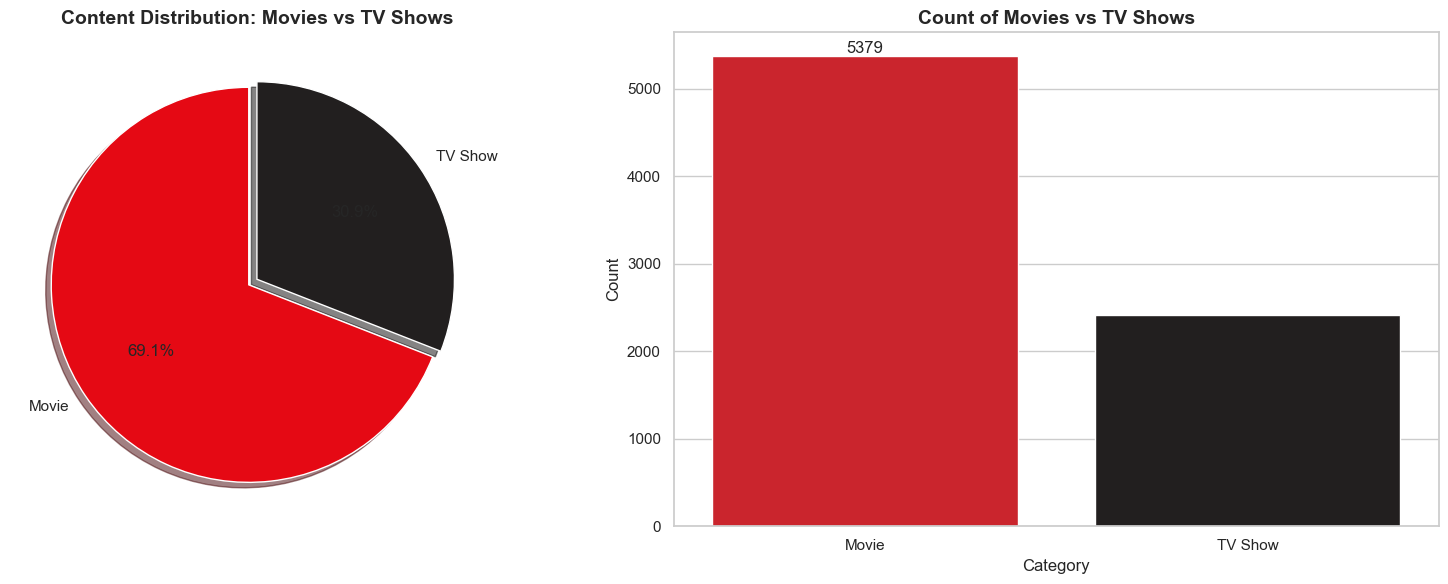


Insight: Netflix has 5379 movies and 2410 TV shows.
   Movies make up 69.1% of the total content.


In [24]:
# Visualization 1: Movies vs TV Shows - Pie Chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Pie Chart
category_counts = df['Category'].value_counts()
colors = ['#E50914', '#221f1f']
explode = (0.05, 0)

ax1.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors, explode=explode, shadow=True)
ax1.set_title('Content Distribution: Movies vs TV Shows', fontsize=14, fontweight='bold')

# Bar Chart
sns.barplot(x=category_counts.index, y=category_counts.values, palette=colors, ax=ax2)
ax2.set_title('Count of Movies vs TV Shows', fontsize=14, fontweight='bold')
ax2.set_xlabel('Category', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)
ax2.bar_label(ax2.containers[0])

plt.tight_layout()
plt.show()

print(f"\nInsight: Netflix has {category_counts['Movie']} movies and {category_counts['TV Show']} TV shows.")
print(f"   Movies make up {(category_counts['Movie']/len(df)*100):.1f}% of the total content.")

### 7.2 Content Growth Trend Over Years

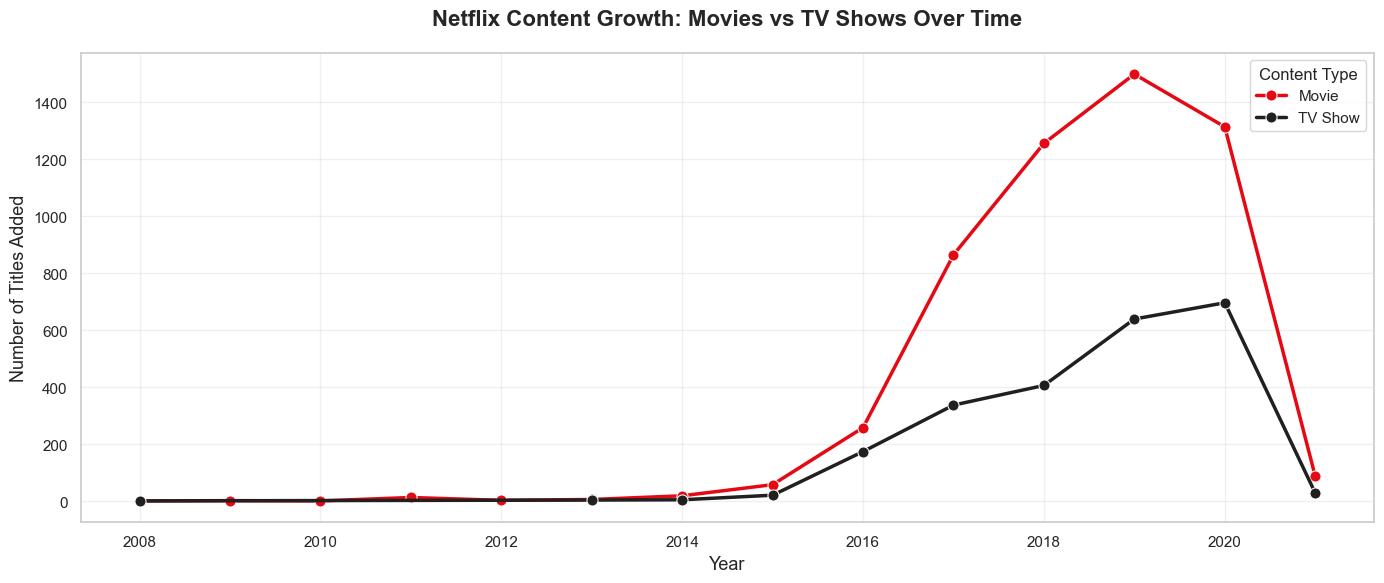


📊 Insight: Peak content addition was in 2019 with 2137 titles added.


In [7]:
# Visualization 2: Content Growth Over Time
plt.figure(figsize=(14, 6))

# Group by year and category
content_trend = df.groupby(['Year', 'Category']).size().reset_index(name='Count')

# Line plot
sns.lineplot(data=content_trend, x='Year', y='Count', hue='Category', 
             marker='o', markersize=8, linewidth=2.5, palette=['#E50914', '#221f1f'])

plt.title('Netflix Content Growth: Movies vs TV Shows Over Time', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Number of Titles Added', fontsize=13)
plt.legend(title='Content Type', fontsize=11, title_fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Find peak year
yearly_totals = df['Year'].value_counts().sort_index()
peak_year = yearly_totals.idxmax()
peak_count = yearly_totals.max()
print(f"\n📊 Insight: Peak content addition was in {int(peak_year)} with {int(peak_count)} titles added.")

### 7.3 Top Genres Analysis

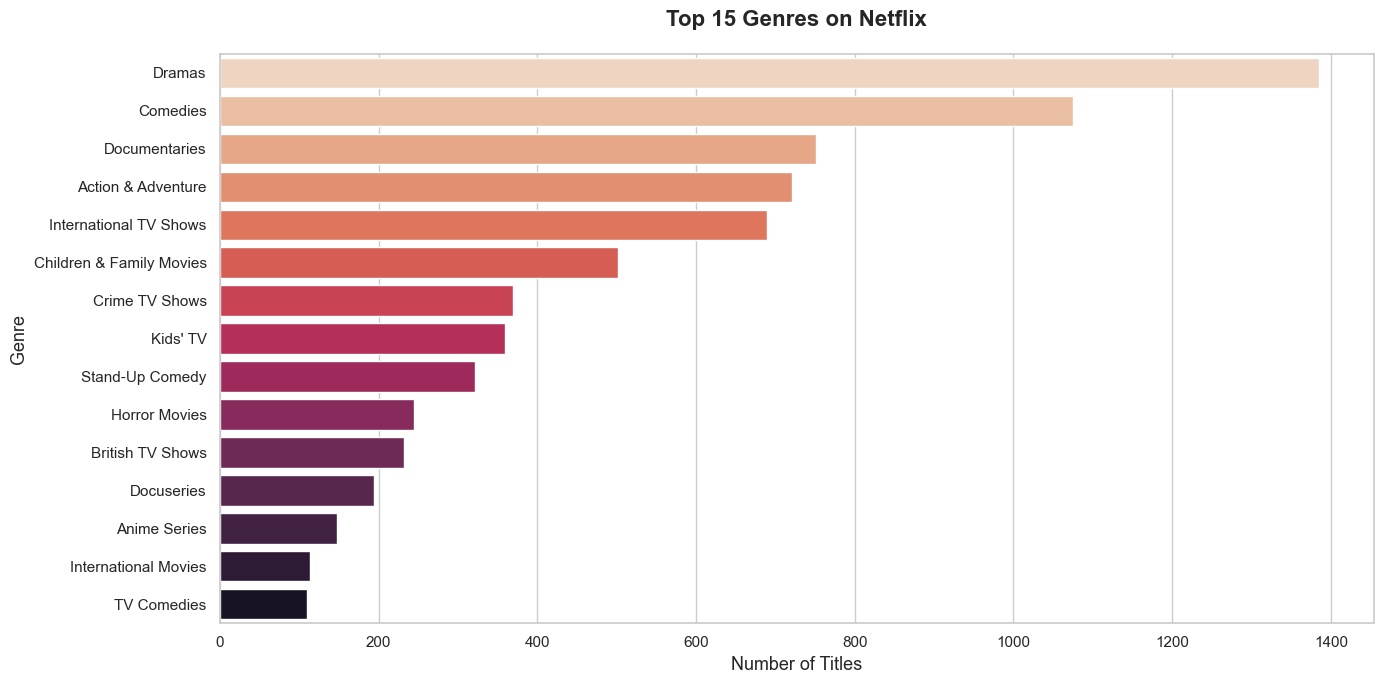


📊 Insight: The most popular genre is 'Dramas' with 1385 titles.
   The top 3 genres account for 41.2% of all content.


In [8]:
# Visualization 3: Top 15 Genres
plt.figure(figsize=(14, 7))

top_genres = df['Main_Genre'].value_counts().head(15)
sns.barplot(y=top_genres.index, x=top_genres.values, palette='rocket_r')

plt.title('Top 15 Genres on Netflix', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Titles', fontsize=13)
plt.ylabel('Genre', fontsize=13)
plt.tight_layout()
plt.show()

print(f"\n📊 Insight: The most popular genre is '{top_genres.index[0]}' with {top_genres.values[0]} titles.")
print(f"   The top 3 genres account for {(top_genres.head(3).sum()/len(df)*100):.1f}% of all content.")

### 7.4 Genre Popularity Trends Over Time

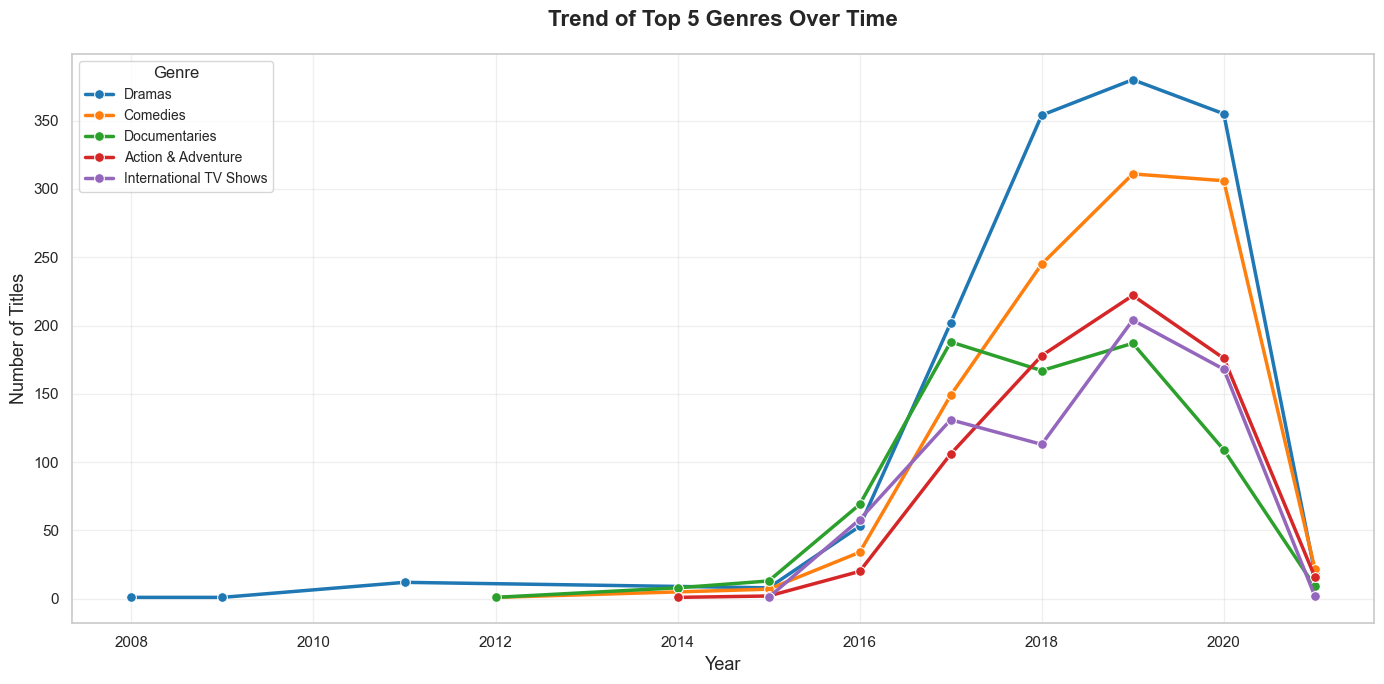


📊 Insight: Genre preferences have evolved significantly over the years.


In [9]:
# Visualization 4: Genre Trends Over Time
plt.figure(figsize=(14, 7))

# Select top 5 genres
popular_genres = df['Main_Genre'].value_counts().head(5).index
genre_trends = df[df['Main_Genre'].isin(popular_genres)].groupby(['Year', 'Main_Genre']).size().reset_index(name='Count')

sns.lineplot(data=genre_trends, x='Year', y='Count', hue='Main_Genre', 
             marker='o', markersize=7, linewidth=2.5, palette='tab10')

plt.title('Trend of Top 5 Genres Over Time', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Number of Titles', fontsize=13)
plt.legend(title='Genre', fontsize=10, title_fontsize=12, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📊 Insight: Genre preferences have evolved significantly over the years.")

### 7.5 Country-wise Content Distribution

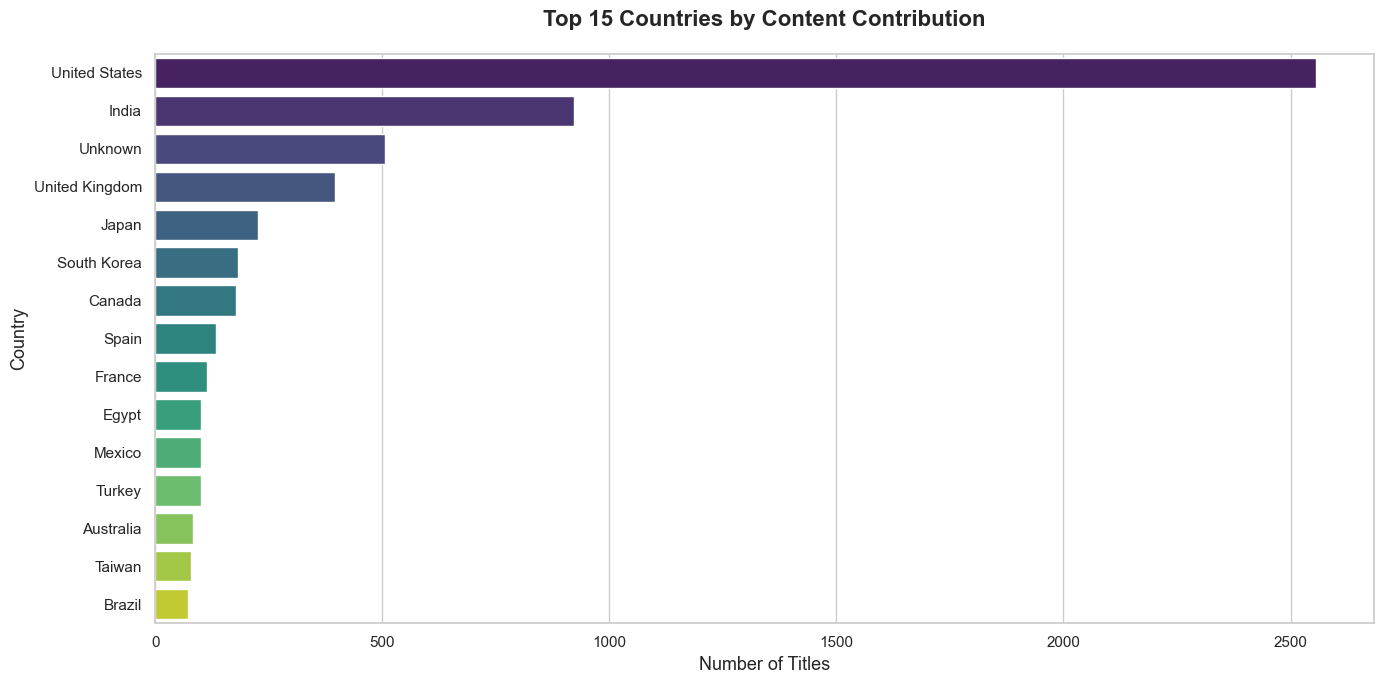


📊 Insight: United States leads with 2556 titles.
   Top 5 countries contribute 59.2% of all content.


In [10]:
# Visualization 5: Top Countries
plt.figure(figsize=(14, 7))

top_countries = df['Country'].value_counts().head(15)
colors_gradient = sns.color_palette("viridis", len(top_countries))

sns.barplot(y=top_countries.index, x=top_countries.values, palette=colors_gradient)

plt.title('Top 15 Countries by Content Contribution', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Titles', fontsize=13)
plt.ylabel('Country', fontsize=13)
plt.tight_layout()
plt.show()

print(f"\n📊 Insight: {top_countries.index[0]} leads with {top_countries.values[0]} titles.")
print(f"   Top 5 countries contribute {(top_countries.head(5).sum()/len(df)*100):.1f}% of all content.")

### 7.6 Movies vs TV Shows by Country

<Figure size 1400x700 with 0 Axes>

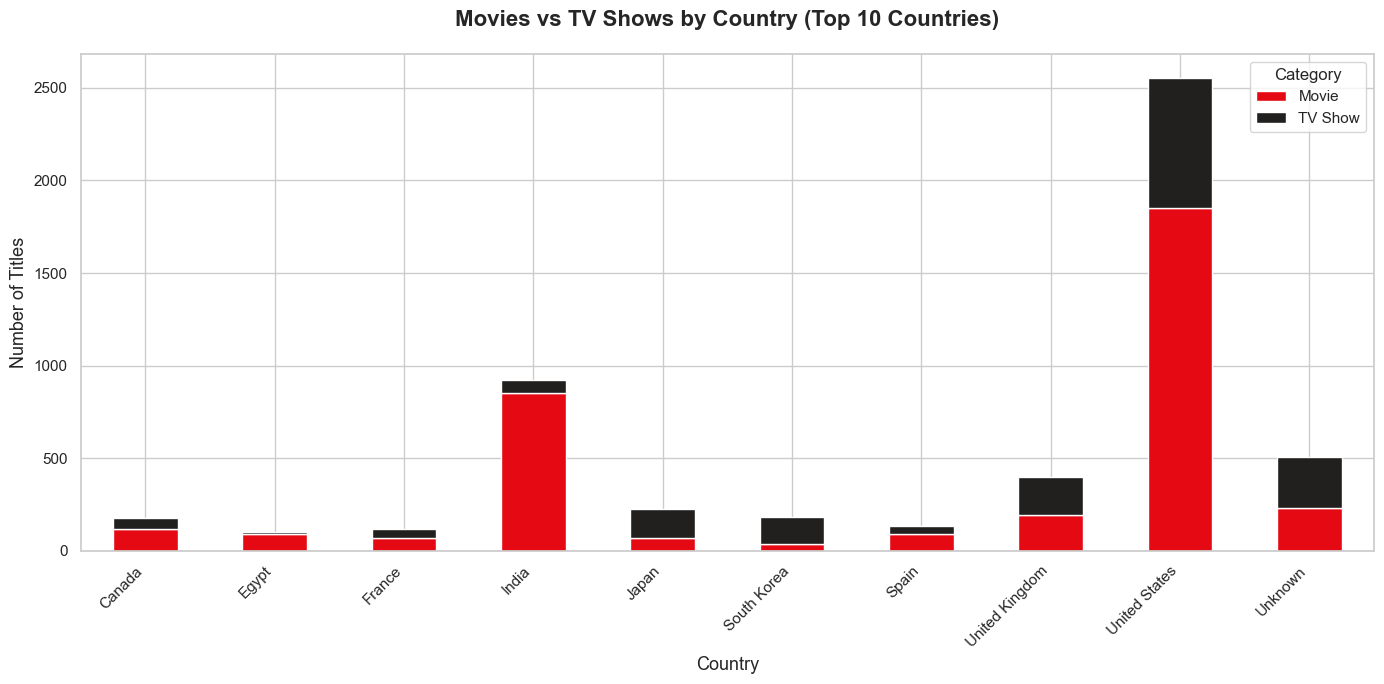


📊 Insight: Different countries have varying preferences for Movies vs TV Shows.


In [11]:
# Visualization 6: Stacked Bar Chart - Content Type by Country
plt.figure(figsize=(14, 7))

top_countries_list = df['Country'].value_counts().head(10).index
country_data = df[df['Country'].isin(top_countries_list)]
stacked = country_data.groupby(['Country', 'Category']).size().unstack(fill_value=0)

stacked.plot(kind='bar', stacked=True, figsize=(14,7), color=['#E50914', '#221f1f'])
plt.title('Movies vs TV Shows by Country (Top 10 Countries)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Country', fontsize=13)
plt.ylabel('Number of Titles', fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category', fontsize=11)
plt.tight_layout()
plt.show()

print(f"\n📊 Insight: Different countries have varying preferences for Movies vs TV Shows.")

### 7.7 Content Ratings Distribution

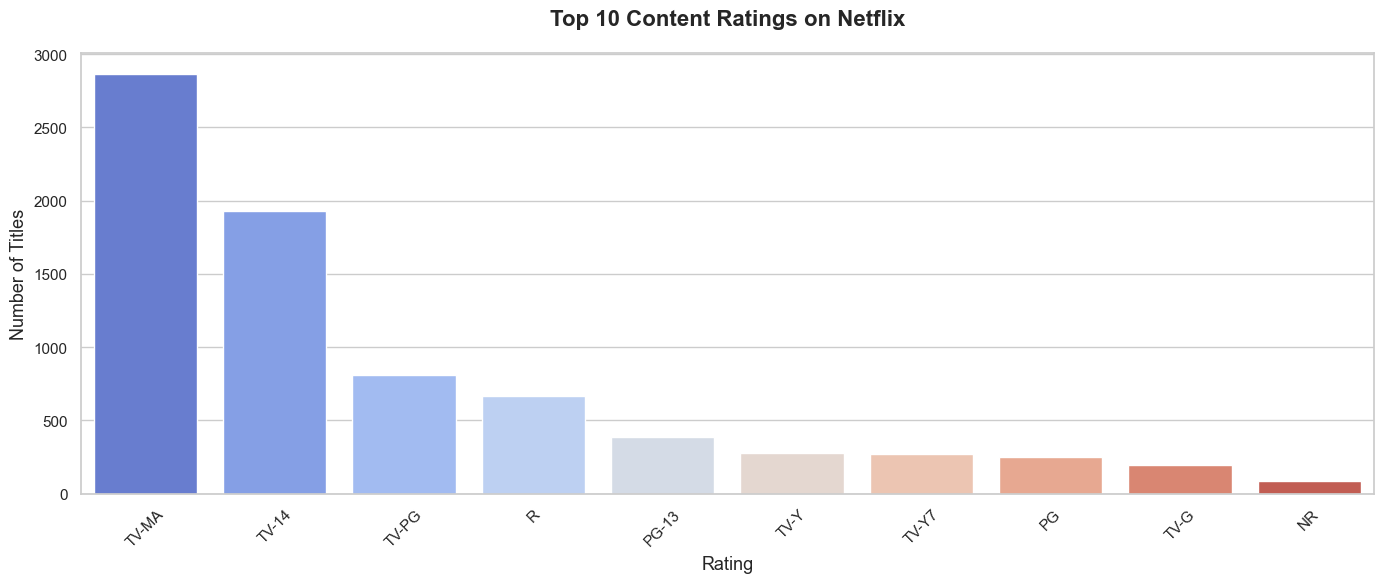


📊 Insight: The most common rating is 'TV-MA' with 2865 titles.


In [12]:
# Visualization 7: Content Ratings
plt.figure(figsize=(14, 6))

top_ratings = df['Rating'].value_counts().head(10)
sns.barplot(x=top_ratings.index, y=top_ratings.values, palette='coolwarm')

plt.title('Top 10 Content Ratings on Netflix', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Rating', fontsize=13)
plt.ylabel('Number of Titles', fontsize=13)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"\n📊 Insight: The most common rating is '{top_ratings.index[0]}' with {top_ratings.values[0]} titles.")

### 7.8 Movie Duration Analysis

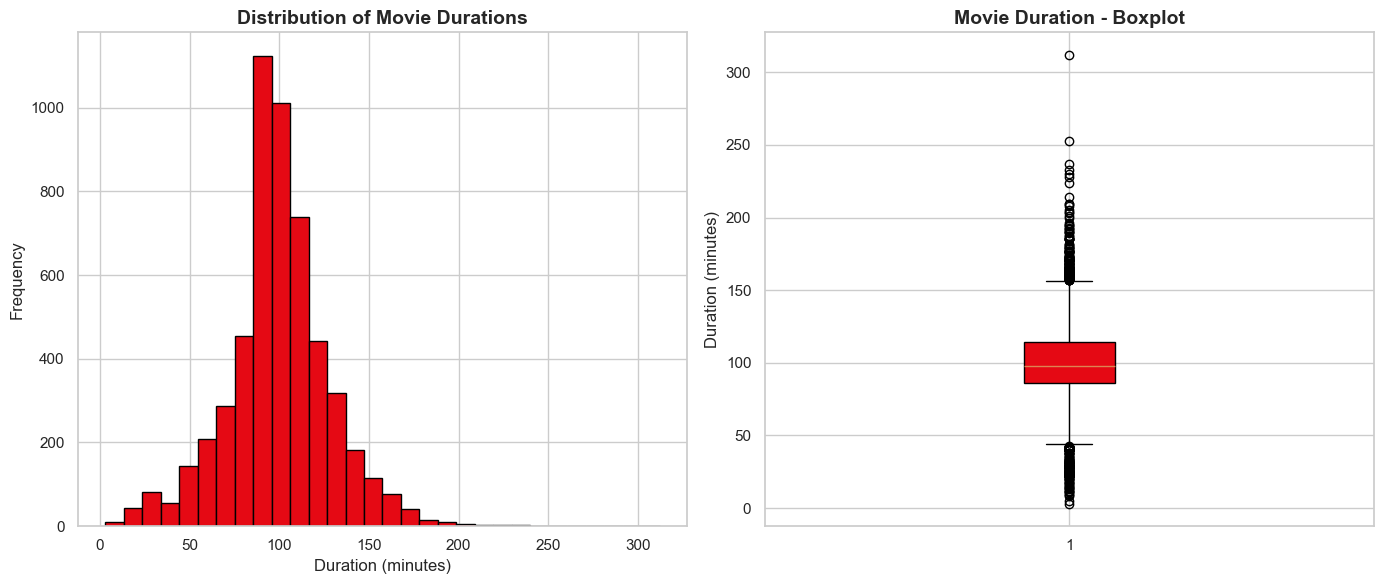


📊 Insight: Average movie duration is 99 minutes.
   Median movie duration is 98 minutes.


In [13]:
# Visualization 8: Movie Duration Distribution
movies_df = df[df['Category'] == 'Movie'].copy()

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(movies_df['Duration_Minutes'].dropna(), bins=30, color='#E50914', edgecolor='black')
plt.title('Distribution of Movie Durations', fontsize=14, fontweight='bold')
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(1, 2, 2)
plt.boxplot(movies_df['Duration_Minutes'].dropna(), vert=True, patch_artist=True,
            boxprops=dict(facecolor='#E50914'))
plt.title('Movie Duration - Boxplot', fontsize=14, fontweight='bold')
plt.ylabel('Duration (minutes)', fontsize=12)

plt.tight_layout()
plt.show()

avg_duration = movies_df['Duration_Minutes'].mean()
median_duration = movies_df['Duration_Minutes'].median()
print(f"\n📊 Insight: Average movie duration is {avg_duration:.0f} minutes.")
print(f"   Median movie duration is {median_duration:.0f} minutes.")

### 7.9 TV Show Seasons Analysis

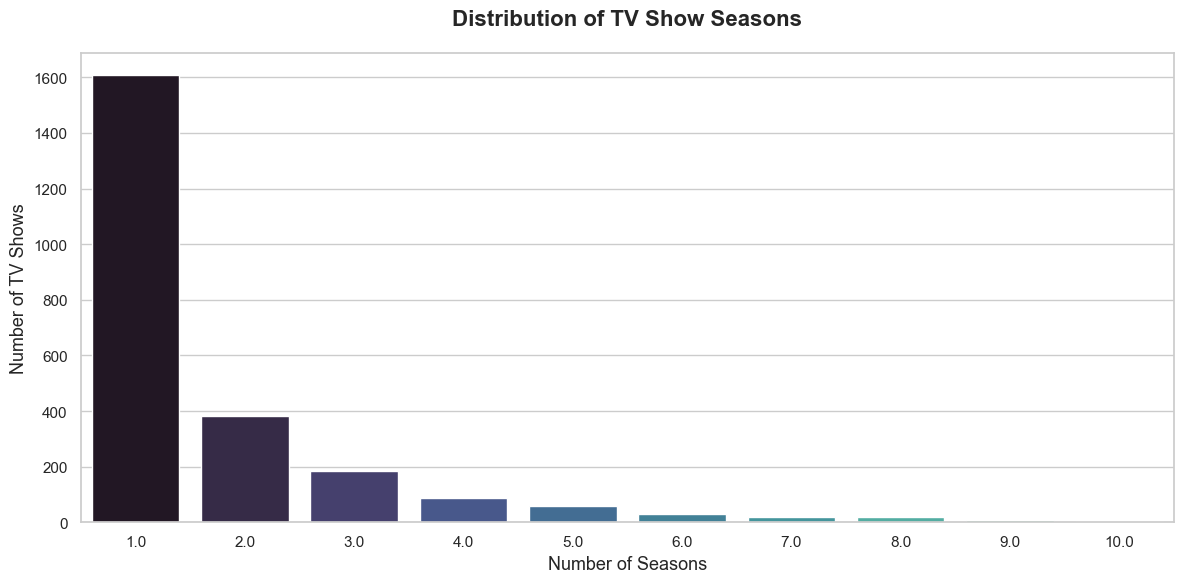


📊 Insight: Average number of seasons per TV show is 1.8.
   Most TV shows have 1.0 season(s).


In [14]:
# Visualization 9: TV Show Seasons Distribution
tv_shows_df = df[df['Category'] == 'TV Show'].copy()

plt.figure(figsize=(12, 6))
seasons_count = tv_shows_df['Num_Seasons'].value_counts().sort_index().head(10)
sns.barplot(x=seasons_count.index, y=seasons_count.values, palette='mako')

plt.title('Distribution of TV Show Seasons', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Seasons', fontsize=13)
plt.ylabel('Number of TV Shows', fontsize=13)
plt.tight_layout()
plt.show()

avg_seasons = tv_shows_df['Num_Seasons'].mean()
print(f"\n📊 Insight: Average number of seasons per TV show is {avg_seasons:.1f}.")
print(f"   Most TV shows have {seasons_count.index[0]} season(s).")

### 7.10 Content Addition by Month

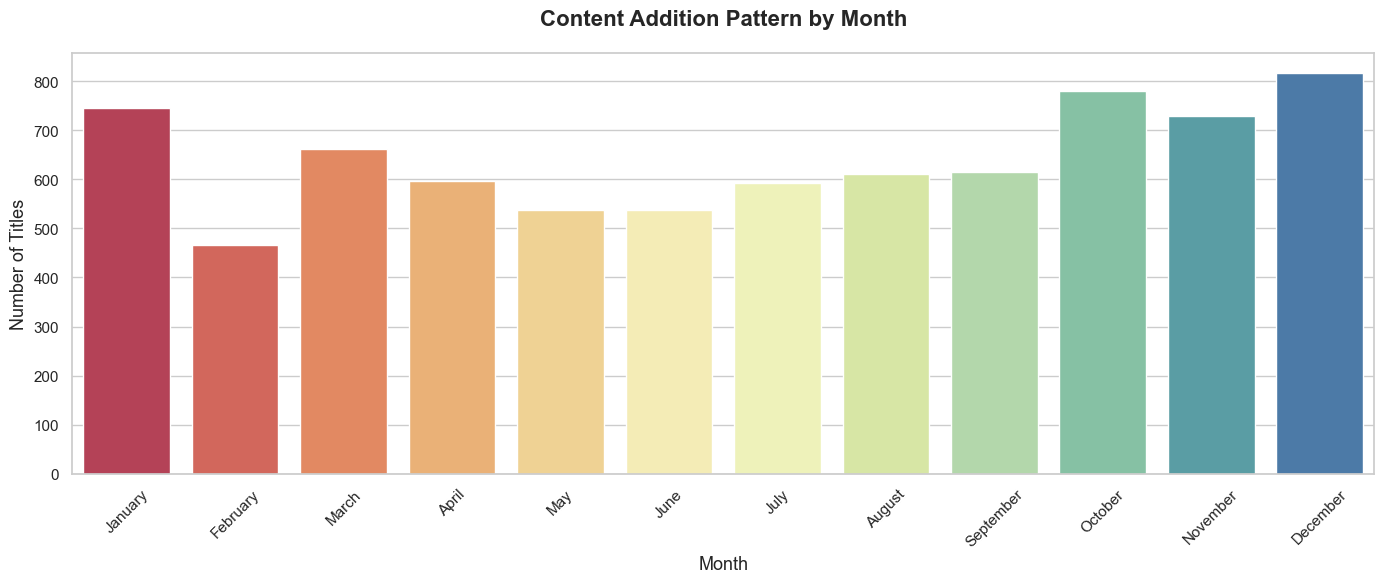


📊 Insight: Most content is added in December with 817 titles.


In [15]:
# Visualization 10: Monthly Content Addition Pattern
plt.figure(figsize=(14, 6))

monthly_content = df['Month_Name'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

sns.barplot(x=monthly_content.index, y=monthly_content.values, palette='Spectral')
plt.title('Content Addition Pattern by Month', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=13)
plt.ylabel('Number of Titles', fontsize=13)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

peak_month = monthly_content.idxmax()
print(f"\n📊 Insight: Most content is added in {peak_month} with {monthly_content.max()} titles.")

### 7.11 Interactive Choropleth Map - Global Content Distribution

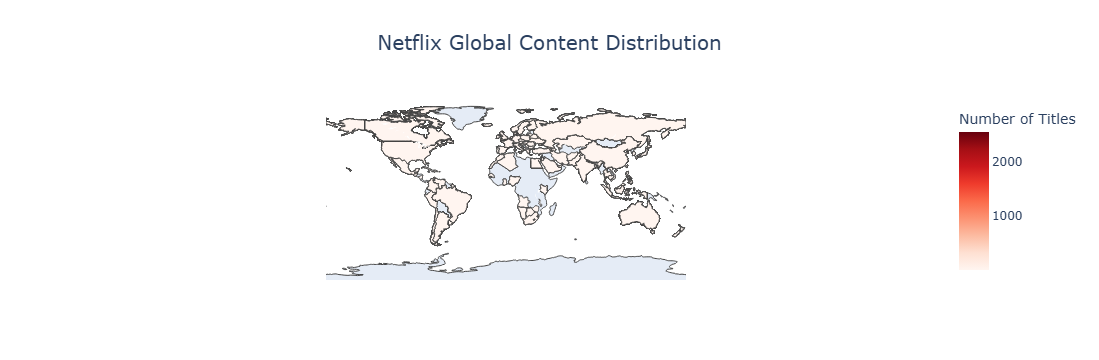


📊 Insight: Interactive map shows global content distribution across countries.


In [17]:
# Visualization 11: Interactive World Map
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

fig = px.choropleth(
    country_counts, 
    locations="Country", 
    locationmode="country names",
    color="Count", 
    hover_name="Country",
    color_continuous_scale="Reds",
    title="Netflix Global Content Distribution",
    labels={'Count': 'Number of Titles'}
)

fig.update_layout(
    title_font_size=20,
    title_x=0.5,
    geo=dict(showframe=False, showcoastlines=True)
)

fig.show()

print(f"\n📊 Insight: Interactive map shows global content distribution across countries.")

### 7.12 Heatmap - Content Type vs Rating

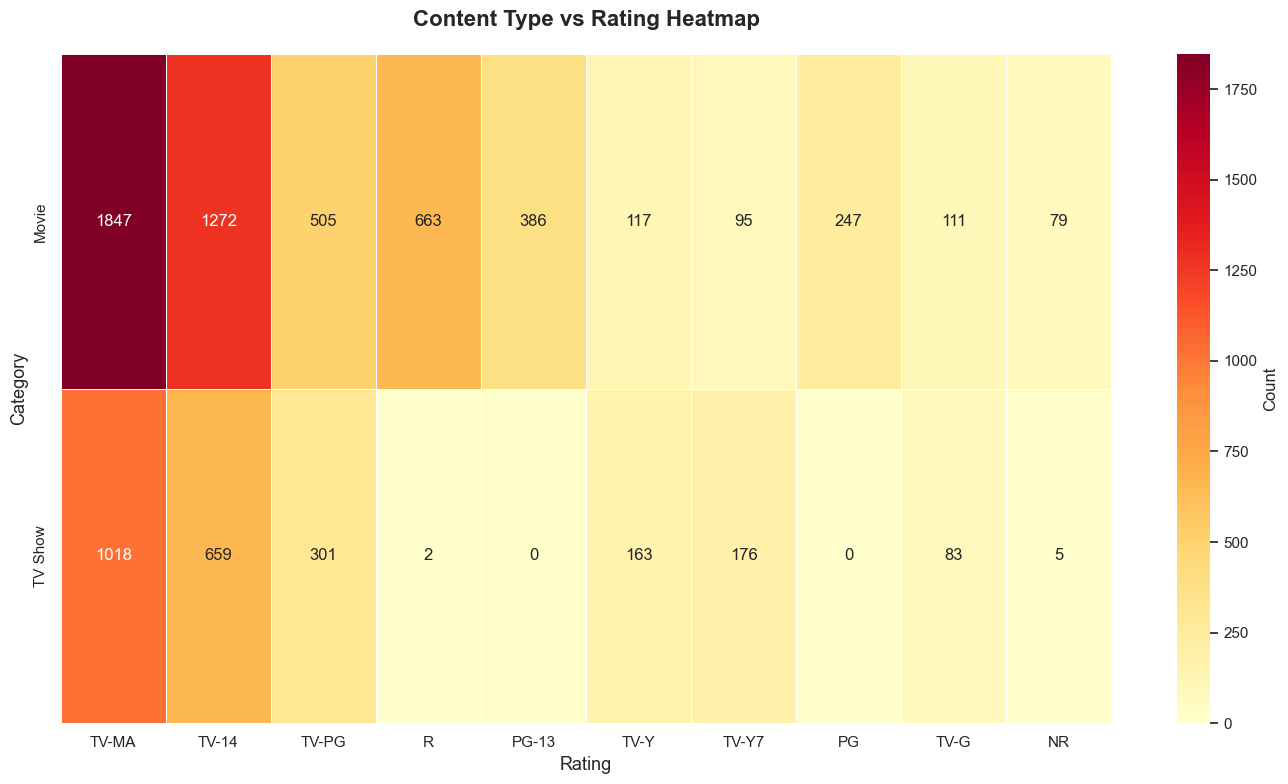


📊 Insight: Heatmap reveals the distribution of content types across different ratings.


In [18]:
# Visualization 12: Heatmap - Category vs Rating
plt.figure(figsize=(14, 8))

heatmap_data = pd.crosstab(df['Category'], df['Rating'])
top_ratings_list = df['Rating'].value_counts().head(10).index
heatmap_data = heatmap_data[top_ratings_list]

sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd', linewidths=0.5, cbar_kws={'label': 'Count'})
plt.title('Content Type vs Rating Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Rating', fontsize=13)
plt.ylabel('Category', fontsize=13)
plt.tight_layout()
plt.show()

print(f"\n📊 Insight: Heatmap reveals the distribution of content types across different ratings.")

---

## 8. Advanced Analysis

### 8.1 Top Directors

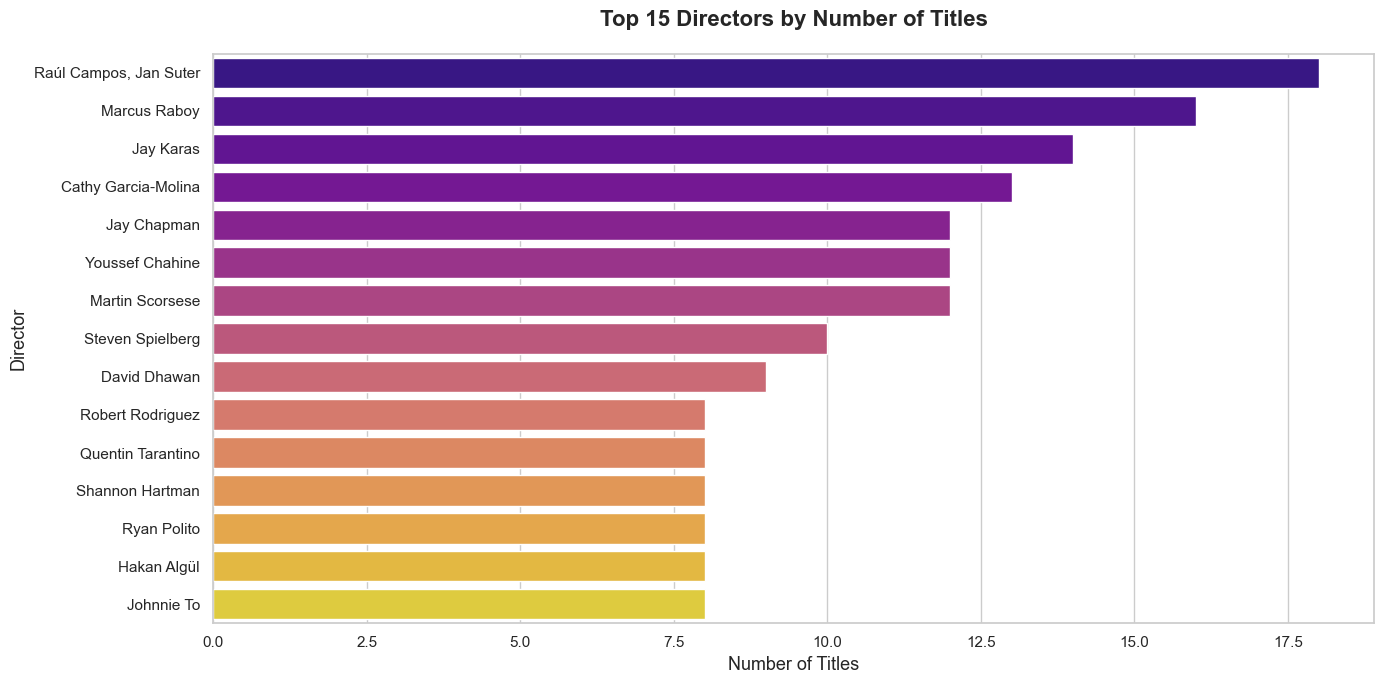


📊 Insight: Raúl Campos, Jan Suter is the most prolific director with 18 titles.


In [19]:
# Top Directors Analysis
top_directors = df[df['Director'] != 'Unknown']['Director'].value_counts().head(15)

plt.figure(figsize=(14, 7))
sns.barplot(y=top_directors.index, x=top_directors.values, palette='plasma')
plt.title('Top 15 Directors by Number of Titles', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Titles', fontsize=13)
plt.ylabel('Director', fontsize=13)
plt.tight_layout()
plt.show()

print(f"\n📊 Insight: {top_directors.index[0]} is the most prolific director with {top_directors.values[0]} titles.")

### 8.2 Content Growth Rate Analysis

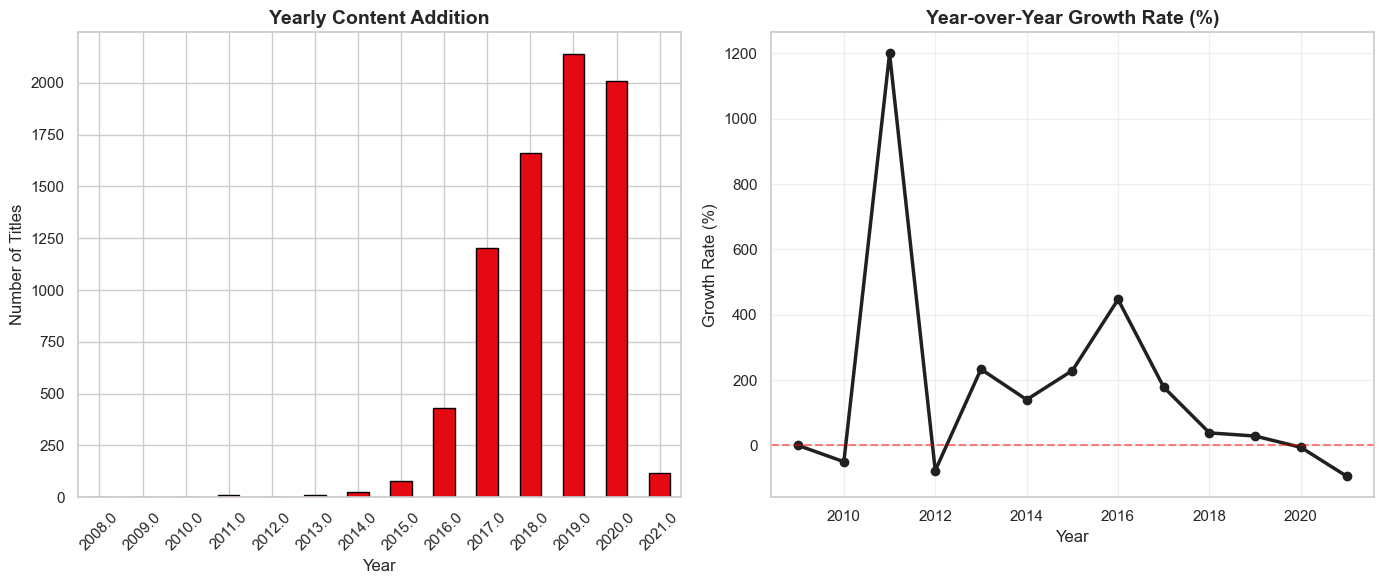


Insight: Content growth rate varies significantly year-over-year.


In [25]:
# Year-over-Year Growth Rate
yearly_counts = df['Year'].value_counts().sort_index()
growth_rate = yearly_counts.pct_change() * 100

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
yearly_counts.plot(kind='bar', color='#E50914', edgecolor='black')
plt.title('Yearly Content Addition', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
growth_rate.plot(kind='line', marker='o', color='#221f1f', linewidth=2.5)
plt.title('Year-over-Year Growth Rate (%)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nInsight: Content growth rate varies significantly year-over-year.")

### 8.3 Genre Diversity by Country

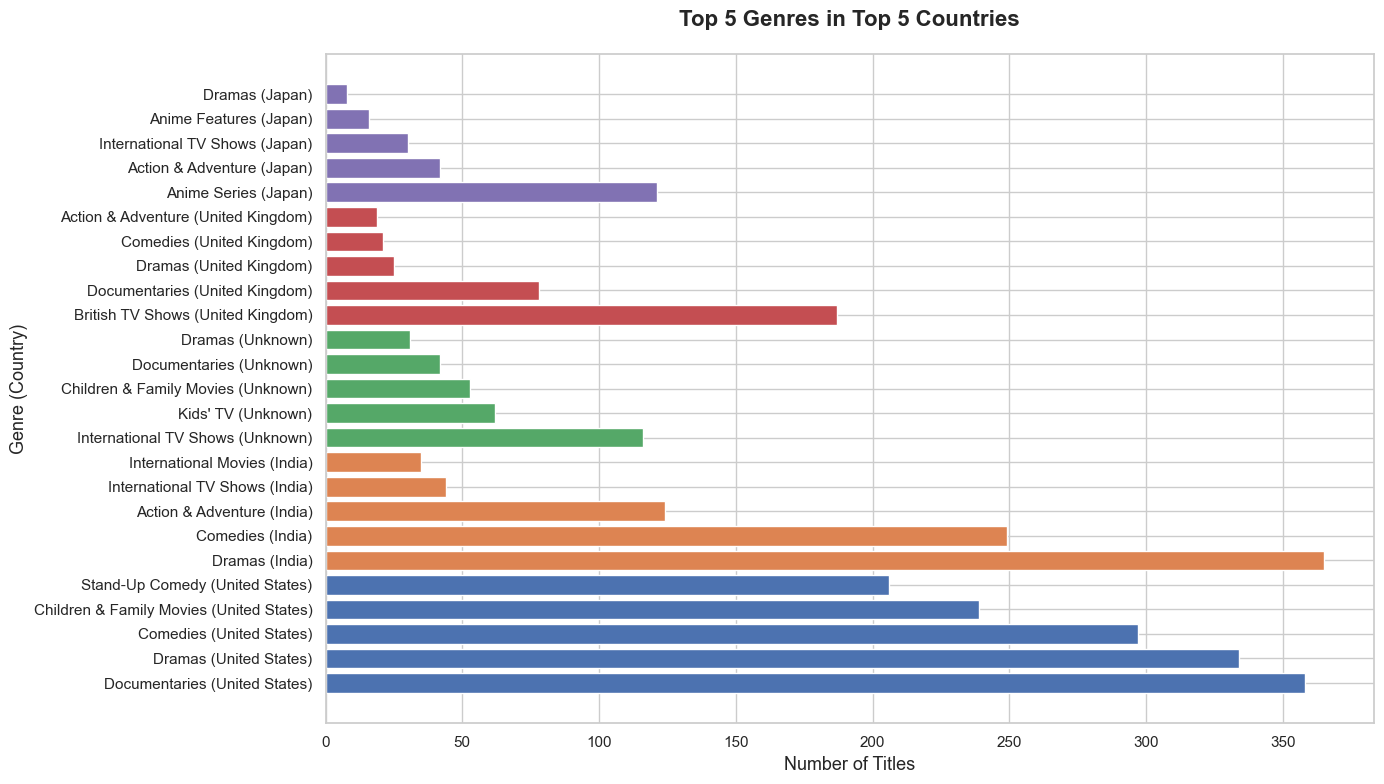


📊 Insight: Different countries show preference for different genres.


In [21]:
# Genre Diversity Analysis
top_5_countries = df['Country'].value_counts().head(5).index
genre_diversity = df[df['Country'].isin(top_5_countries)].groupby(['Country', 'Main_Genre']).size().reset_index(name='Count')

plt.figure(figsize=(14, 8))
for country in top_5_countries:
    country_data = genre_diversity[genre_diversity['Country'] == country].sort_values('Count', ascending=False).head(5)
    plt.barh(country_data['Main_Genre'] + ' (' + country + ')', country_data['Count'])

plt.title('Top 5 Genres in Top 5 Countries', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Titles', fontsize=13)
plt.ylabel('Genre (Country)', fontsize=13)
plt.tight_layout()
plt.show()

print(f"\n📊 Insight: Different countries show preference for different genres.")

---

## 9. Key Findings and Insights

### Summary of Analysis

In [22]:
# Generate comprehensive summary
print("=" * 80)
print("KEY FINDINGS AND STRATEGIC INSIGHTS")
print("=" * 80)

print("\n1. CONTENT DISTRIBUTION:")
movie_pct = (df['Category'].value_counts()['Movie'] / len(df) * 100)
tv_pct = (df['Category'].value_counts()['TV Show'] / len(df) * 100)
print(f"   • Movies: {movie_pct:.1f}% ({df['Category'].value_counts()['Movie']} titles)")
print(f"   • TV Shows: {tv_pct:.1f}% ({df['Category'].value_counts()['TV Show']} titles)")
print(f"   → Netflix has a strong focus on movies over TV shows.")

print("\n2. TEMPORAL TRENDS:")
yearly_totals = df['Year'].value_counts().sort_index()
peak_year = int(yearly_totals.idxmax())
peak_count = int(yearly_totals.max())
print(f"   • Dataset spans: {int(df['Year'].min())} - {int(df['Year'].max())}")
print(f"   • Peak year: {peak_year} with {peak_count} titles")
recent_growth = yearly_totals.iloc[-1] - yearly_totals.iloc[-2]
print(f"   • Recent trend: {'Growth' if recent_growth > 0 else 'Decline'} of {abs(int(recent_growth))} titles")

print("\n3. GENRE INSIGHTS:")
top_3_genres = df['Main_Genre'].value_counts().head(3)
print(f"   • Top Genre: {top_3_genres.index[0]} ({top_3_genres.values[0]} titles)")
print(f"   • Second: {top_3_genres.index[1]} ({top_3_genres.values[1]} titles)")
print(f"   • Third: {top_3_genres.index[2]} ({top_3_genres.values[2]} titles)")
print(f"   → Top 3 genres represent {(top_3_genres.sum()/len(df)*100):.1f}% of all content")

print("\n4. GEOGRAPHICAL DISTRIBUTION:")
top_3_countries = df['Country'].value_counts().head(3)
print(f"   • Leading Country: {top_3_countries.index[0]} ({top_3_countries.values[0]} titles)")
print(f"   • Second: {top_3_countries.index[1]} ({top_3_countries.values[1]} titles)")
print(f"   • Third: {top_3_countries.index[2]} ({top_3_countries.values[2]} titles)")
unique_countries = df['Country'].nunique()
print(f"   → Content from {unique_countries} different countries")

print("\n5. CONTENT CHARACTERISTICS:")
avg_movie_duration = df[df['Category'] == 'Movie']['Duration_Minutes'].mean()
avg_tv_seasons = df[df['Category'] == 'TV Show']['Num_Seasons'].mean()
print(f"   • Average movie duration: {avg_movie_duration:.0f} minutes")
print(f"   • Average TV show seasons: {avg_tv_seasons:.1f}")
most_common_rating = df['Rating'].value_counts().index[0]
print(f"   • Most common rating: {most_common_rating}")

print("\n6. DIVERSITY METRICS:")
unique_genres = df['Main_Genre'].nunique()
unique_directors = df[df['Director'] != 'Unknown']['Director'].nunique()
print(f"   • Unique genres: {unique_genres}")
print(f"   • Unique directors: {unique_directors}")
print(f"   → High content diversity across multiple dimensions")

print("\n" + "=" * 80)

KEY FINDINGS AND STRATEGIC INSIGHTS

1. CONTENT DISTRIBUTION:
   • Movies: 69.1% (5379 titles)
   • TV Shows: 30.9% (2410 titles)
   → Netflix has a strong focus on movies over TV shows.

2. TEMPORAL TRENDS:
   • Dataset spans: 2008 - 2021
   • Peak year: 2019 with 2137 titles
   • Recent trend: Decline of 1892 titles

3. GENRE INSIGHTS:
   • Top Genre: Dramas (1385 titles)
   • Second: Comedies (1075 titles)
   • Third: Documentaries (751 titles)
   → Top 3 genres represent 41.2% of all content

4. GEOGRAPHICAL DISTRIBUTION:
   • Leading Country: United States (2556 titles)
   • Second: India (923 titles)
   • Third: Unknown (507 titles)
   → Content from 682 different countries

5. CONTENT CHARACTERISTICS:
   • Average movie duration: 99 minutes
   • Average TV show seasons: 1.8
   • Most common rating: TV-MA

6. DIVERSITY METRICS:
   • Unique genres: 36
   • Unique directors: 4050
   → High content diversity across multiple dimensions



---

## 10. Strategic Recommendations

Based on the comprehensive data analysis, here are the strategic recommendations for Netflix:

### 10.1 Content Strategy Recommendations

1. **Balance Movies and TV Shows**
   - Current data shows heavy movie focus
   - Consider increasing TV show production for better viewer retention
   - TV shows create sustained engagement over time

2. **Genre Diversification**
   - Top genres dominate the platform
   - Invest in underrepresented genres with growth potential
   - Create genre-specific content hubs

3. **Regional Content Expansion**
   - Strong US and India presence
   - Opportunity in emerging markets
   - Localized content strategy for untapped regions

4. **Content Duration Optimization**
   - Align movie durations with viewer preferences
   - Experiment with limited series (2-3 seasons)
   - Consider shorter-format content for mobile viewers

5. **Release Timing Strategy**
   - Optimize content drops based on monthly patterns
   - Strategic releases during peak months
   - Counter-programming during low months

### 10.2 Data-Driven Action Items

**Short-term (0-6 months):**
- Analyze viewer engagement data for content optimization
- A/B test content recommendations based on genre preferences
- Launch targeted campaigns for underutilized content

**Medium-term (6-12 months):**
- Develop region-specific original content
- Partner with local creators in emerging markets
- Implement dynamic content rating strategies

**Long-term (12+ months):**
- Build comprehensive content prediction models
- Establish content production guidelines based on data insights
- Create international content co-production framework

---

## 11. Conclusion

This comprehensive analysis of Netflix's content library has revealed significant insights into the platform's content strategy, distribution patterns, and growth trends. The data demonstrates:

- **Strong movie focus** with opportunities for TV show expansion
- **Genre concentration** in top categories with diversification potential
- **Geographic dominance** of certain countries with emerging market opportunities
- **Temporal trends** showing evolving content addition patterns
- **Content characteristics** aligned with viewer preferences

By leveraging these data-driven insights, Netflix can:
1. Optimize its content acquisition and production strategy
2. Enhance viewer engagement through targeted content recommendations
3. Expand into underserved markets and genres
4. Maintain competitive advantage in the streaming industry

The analysis provides a solid foundation for strategic decision-making and demonstrates the power of data analytics in understanding and predicting content trends in the OTT industry.

---

## 12. References and Data Sources

- **Dataset:** Netflix Movies and TV Shows Dataset
- **Analysis Period:** 2008 - 2021
- **Tools Used:** Python, Pandas, NumPy, Matplotlib, Seaborn, Plotly
- **Visualization Libraries:** Matplotlib 3.x, Seaborn 0.x, Plotly Express

---

### Project Information

**Project Title:** StreamVision Analytics  
**Tagline:** Decoding Netflix's Global Content Strategy Through Data  
**Analysis Type:** Exploratory Data Analysis (EDA) with Strategic Recommendations  
**Total Visualizations:** 12+ comprehensive charts and graphs  
**Dataset Size:** 7,789 records × 11 features  

---

**End of Analysis**
